<a href="https://colab.research.google.com/github/shxzhang/intro_to_phenomics/blob/main/l01_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Image Programming in Python
**Author**: James Chen, School of Animal Sciences, Virginia Tech

**Date**: Aug 3, 2022

## **Set up the environment**
### Clone the repository (demo data and scripts)

In [25]:
# use a exclamation mark, "!", to call Shell command in Python
!git clone https://github.com/vt-ads/intro_to_phenomics

Cloning into 'intro_to_phenomics'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 318 (delta 0), reused 2 (delta 0), pack-reused 311
Receiving objects: 100% (318/318), 66.54 MiB | 24.78 MiB/s, done.
Resolving deltas: 100% (108/108), done.


### Change the working directory

In [26]:
import os #how to interact with shell. we use os b/c windows in dir, linux uses l, but os is more uniform
# change WD
os.chdir("/content/intro_to_phenomics") 
# print WD
print("Current folder: ", os.getcwd())

Current folder:  /content/intro_to_phenomics


## **NumPy**
Numpy is one of the mostly used Python library in data sciences. It provides an versatile interface for users to manipulate multi-dimensional arrays, particularlly for image data.
In this chapter, we will cover the basic usages of NumPy, including indexing, reshaping, and basic visualization.

### **Load NumPy**
Practically, we use `np` as an aliase name for the NumPy library. But the aliase can also be other arbitrary names.

In [27]:
# load NumPy
import numpy as np #syntax for calling a library. python uses alias for package. Now package numpy is called np in our program.
# validate the library version
np.__version__

'1.21.6'

#### Exercise 1.1
Try to name it differently and validate its version number

In [28]:
# load NumPy
import numpy as numpTest #pass will give error so changed to testpass
# check NumPy version using your aliase name
numpTest.__version__

'1.21.6'

#### Exercise 1.2
Load your own functions

<center><img src="https://github.com/vt-ads/intro_to_phenomics/blob/main/res/l01/imports.png?raw=1" width="800"/></center>

Load the function `make_X` from the script `modules/LS.py`

In [30]:
# import modules
from modules.LS import make_X 

# validate the function by calling it
make_X


<function modules.LS.make_X>

### **Create a 1D array**

#### Explicitly define the values
Use `[]` to represent a list (array)

In [31]:
# create a list (array)
array = [1, 2, 3, 4]
print(array)

[1, 2, 3, 4]


`np.array()`: instantiate a NumPy array (https://numpy.org/doc/stable/reference/generated/numpy.array.html)

In [32]:
# assign the list to a NumPy array
array = [1, 2, 3, 4]
array_np = np.array(array)
# it is equivalent
array_np = np.array([1, 2, 3, 4])
# print the result
print(array_np)

[1 2 3 4]


#### All-zero or all-one vectors/matrices
<center><img src="https://github.com/vt-ads/intro_to_phenomics/blob/main/res/l01/mask.png?raw=1" width="800"/></center>

`np.zeros()`: create an array of all zeros (https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)

`np.ones()`: create an array of all zeros (https://numpy.org/doc/stable/reference/generated/numpy.ones.html)

This technique is very useful when you want to generate a binary vector/matrix to indicate signals of interest.

In [34]:
array_zeros = np.zeros(15)
print(array_zeros)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
array_ones = np.ones(4)
print(array_ones)

[1. 1. 1. 1.]


#### Arithmetic sequence
`np.arange()`: create a sequence defined by an interval
(https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

`np.linspace()`: create a sequence defined by a size (https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

A way to subset (downsample) a dataset or an image.
<center><img src="https://github.com/vt-ads/intro_to_phenomics/blob/main/res/l01/downsample.png?raw=1" width="1000"/></center>


In [35]:
#^the 3 in the image is 3 channel (RGB), 1340 x 2000 is the pixel dimension
#downsample useful for deep learning b/c they have requirements for input dimension (if image too big)
# np.arange(start, stop, interval)
array_seq_interval = np.arange(1, 10, 2.5)
print(array_seq_interval)

[1.  3.5 6.  8.5]


In [36]:
# np.linspace(start, stop, size)
array_seq_size = np.linspace(1, 10, 4)
print(array_seq_size)

[ 1.  4.  7. 10.]


#### Display arrays
`print()`: Display results in a reader-friendly way. This is very helpful when ones need to debug their codes without using a debugger.

In [37]:
print("A list of numbers: ", array_np)
print("A list of zeros:   ", array_zeros)
print("A list of ones:    ", array_ones)
print("A sequence assigned by an interval: ", array_seq_interval)
print("A sequence assigned by a size:      ", array_seq_size)

A list of numbers:  [1 2 3 4]
A list of zeros:    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


NameError: ignored

#### Exercise 2
Create an array with the same elements `[5, 10, 15, 20]` using two different functions: `np.linspace()` and `np.arange()`

In [45]:
# Fill in correct parameters
array_A = np.linspace(5, 20, 4) #4 = divide in 4 steps
array_B = np.arange(5, 25, 5) #5 = by steps of 5 excluding last one <<python will ignore last number in a loop
#python doesn't require you to stick with 1 data type
#python will automatically convert it from int to boolean etc

print("array_A ", array_A)
print("array_B ", array_B)

array_A  [ 5. 10. 15. 20.]
array_B  [ 5 10 15 20]


### **Multi-dimensional matrix**
NumPy is also capable of dealing with N-dimensional data structure. Here we will introduce several ways to create an N-dimensional matrix.

Explicitly assign values to create a 2D matirx

In [46]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])
#you just add another pair of bracket foranother dimension
print(A)

[[1 2 3]
 [4 5 6]]


#### Shape
In Python, `Shape` is an important component used to describe the dimension of a matrix. `Shape` in Python can be defined by a tuple, `()`.

`np.shape()`: examine the matrix dimension (https://numpy.org/doc/stable/reference/generated/numpy.shape.html)

In [47]:
# (row, column)
#always make sure your data is in right shape to make sure you dimension is right
#gives it in rows and columns
#() is called tuple in python to describe shape
print("Matrix\n", A)
print("\n")
print("Shape: ", A.shape)

Matrix
 [[1 2 3]
 [4 5 6]]


Shape:  (2, 3)


Create a all-zero or all-one nd-matrix by assigning the dimension (`shape`).

In [48]:
# shape: (row, column)
shape = (2, 3)
B = np.zeros(shape)
print("B\n", B)

# shape: (row, column, channel)
C = np.ones((2, 3, 4))
print("C\n", C)

B
 [[0. 0. 0.]
 [0. 0. 0.]]
C
 [[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


In a convolutional neural network, flattening a matrix is a common approach to turn an image matrix into a regression vector.

<center><img src="https://github.com/vt-ads/intro_to_phenomics/blob/main/res/l01/cnn.png?raw=1" width="800"/></center>

<center><img src="https://github.com/vt-ads/intro_to_phenomics/blob/main/res/l01/flatten.png?raw=1" width="800"/></center>


`np.reshape()`: a handy function to turn a one-dimension array to a two-dimension matrix.
(https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)

`np.flatten()`: "flatten" the matrix back to a one-dimension array using the function (https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html)


In [49]:
# create a 1D array with 6 elements
a = np.array([1, 2, 3, 4, 5, 6])
print("'a'\n", a)

# reshape it into a 2D array, with 2 rows and 3 columns
a_reshape = a.reshape((2, 3))
print("\nReshaped 'a' (2x3)\n", a_reshape)

'a'
 [1 2 3 4 5 6]

Reshaped 'a' (2x3)
 [[1 2 3]
 [4 5 6]]


In [50]:
a_reshape.flatten()

array([1, 2, 3, 4, 5, 6])

#### CNN example
https://www.cs.cmu.edu/~aharley/vis/conv/flat.html

<center><img src="https://github.com/vt-ads/intro_to_phenomics/blob/main/res/l01/cnn_cmu.png?raw=1" width="600"/></center>

^flatten array to find linear combination that generates the pattern of the image
^can estimate slope and biase

#### Exercise 3
* Make a 3D array: $[\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix}$, $\begin{bmatrix} 7 & 8 & 9 \\ 10 & 11 & 12 \end{bmatrix}]$

* Flatten it to a 1D array. The expected flatten array is: $\begin{bmatrix} 1& 2& 3& 4& 5& 6& 7& 8& 9& 10& 11& 12\end{bmatrix}$


In [86]:
array_3d = np.array(
    [
        [[1,2,3],
         [4,5,6]],
                    [[7,8,9],
                     [9,11,12]]
    ])


print(array_3d)
flatten_array = array_3d.flatten()
print(flatten_array)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [ 9 11 12]]]
[ 1  2  3  4  5  6  7  8  9  9 11 12]


### **Indexing and slicing**
Indexing is a flexible way to subset the matrix by certain conditions (e.g., positions, values). First, we will create a two-dimension matrix. Note that we can connect multiple functions in one line using dot `.` to enhance the readability (It is called piping `|` in Unix).

In [57]:
# create a 2D matrix with 5 rows and 6 columns
data = np.linspace(1, 30, 30).reshape((5, 6)) #pipping reshape at start of new line
print("data shape: ", data.shape)
print(data)

data shape:  (5, 6)
[[ 1.  2.  3.  4.  5.  6.]
 [ 7.  8.  9. 10. 11. 12.]
 [13. 14. 15. 16. 17. 18.]
 [19. 20. 21. 22. 23. 24.]
 [25. 26. 27. 28. 29. 30.]]


#### Indexing
A 2D-matrix is stored in the order of [rows, columns] and is indexed by `0-based` indexing. For exaple, if we want to call the first (index = 0) column, we can do:

In [58]:
# Use ":" to return all elements in that specific dimension.
# In our case, it returns all numbers from the `first` column
#remember 1st number is rows
#python starts counting with 0, so if you want 2nd column you'd use 1
data[:, 0]

array([ 1.,  7., 13., 19., 25.])

We can also query a single element, for example, the number in the `second` (index = 1) rows and the `third` (index = 2) column.

In [ ]:
# [row, column]
data[1, 2]

9.0

It's also possible to call the last N elements using negative index. For example, we can call `the last second row` by:

In [ ]:
data[-2, ] 

array([19., 20., 21., 22., 23., 24.])

#### Slicing
Slicing a matrix allows you to query a range of elements. Below we want to fetch elements between the `second` row and the `fourth` row, and the `third` column and the `fifth` column.

In [59]:
data[1:4, 2:5]

array([[ 9., 10., 11.],
       [15., 16., 17.],
       [21., 22., 23.]])

Use double colon `::` to extract every two columns (i.e., 1st, 3rd, and 5th) from the matrix.

In [ ]:
data[:, ::2] #start from first column and every 2 column we sample that. ::3 would extract every 3 columns

array([[ 1.,  3.,  5.],
       [ 7.,  9., 11.],
       [13., 15., 17.],
       [19., 21., 23.],
       [25., 27., 29.]])

#### Exercise 4
Start with an array $x = [\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix}$, $\begin{bmatrix} 7 & 8 & 9 \\ 10 & 11 & 12 \end{bmatrix}]$. Use indexing, slicing, and `np.flatten()` to generate an array $y = \begin{bmatrix} 1& 4& 3& 6\end{bmatrix}$

In [71]:
x = (np.arange(12) + 1).reshape((2, 2, 3)) #row, by column by
y = x[0,:,::2].flatten()
print(y)

[1 3 4 6]


### **Basic statistics**
Several basic summary statistics, including `mean` and `standard deviation`, can be derived in a `NumPy` matrix.

In [72]:
# create a 3d array in a dimension of (3, 2, 5)
data = np.arange(1, 31, 1).reshape(3, 2, 5)
print("Data\n", data)
print("\n")
print("The data mean is", data.mean()) # np.mean(data)
print("The data standard deviation is", data.std()) # np.std(data)
print("The data median is", np.median(data))
print("The 25th quantile of the data is", np.quantile(data, 0.25))

Data
 [[[ 1  2  3  4  5]
  [ 6  7  8  9 10]]

 [[11 12 13 14 15]
  [16 17 18 19 20]]

 [[21 22 23 24 25]
  [26 27 28 29 30]]]


The data mean is 15.5
The data standard deviation is 8.65544144839919
The data median is 15.5
The 25th quantile of the data is 8.25


#### Summarize data by axis
<center><img src="https://github.com/vt-ads/intro_to_phenomics/blob/main/res/l01/axis.png?raw=1" width="900"/></center>

It's possible to calculate statistics by dimensions. Use the parameter `axis` to specify which dimension is summarized and calculated. This function is handy in processing multispectral/hyperspectral images.

In [73]:
print("Data dimension: ", data.shape) # (channel, row, column)
print("Data matrix\n", data)
print("\n")
pixel_sum = data.sum(axis=0) #summarize 1st axis
print("The sum of all three channel values: \n", pixel_sum)

Data dimension:  (3, 2, 5)
Data matrix
 [[[ 1  2  3  4  5]
  [ 6  7  8  9 10]]

 [[11 12 13 14 15]
  [16 17 18 19 20]]

 [[21 22 23 24 25]
  [26 27 28 29 30]]]


The sum of all three channel values: 
 [[33 36 39 42 45]
 [48 51 54 57 60]]


#### Excercise 5
<center><img src="https://github.com/vt-ads/intro_to_phenomics/blob/main/res/l01/means.png?raw=1" width="500"/></center>

Use either `np.arange()` or `np.linspace()` and `np.reshape()` to create a 2D matrix, $X$. And calculate average values of each row in $X$ using `np.mean()` and the parameter `axis`.

In [ ]:
X = pass
means = np.mean(X, axis=pass)
print(means)

## Matplotlib
`Matplotlib` is a basic visualization library in Python. Its functionalities are similar to `plot()` in `Julia` and `R`. In this section, we will use a demo image to practice the usages of `NumPy`, and we can use `Matplotlib` for data visualization to validate our results.

### **Load Matplotlib**
`Matplotlib` contains several submodules. To implement matrix visualization, we only need to import the submodule `pyplot` from `Matplotlib` and rename it as `plt`.

In [74]:
# use dot "." to call its submodule
import matplotlib.pyplot as plt #<<common aliase for this library
# equivalent
from matplotlib import pyplot as plt

### **Load your first image**
An image loader has been defined in the file `image_handler.py` and can be accessed by the keywords `from` and `import`.

In [75]:
# import pre-defined function
from modules.image_handler import load_img

# load the image file (you can use your own image, too!)
image = load_img("data/cow.jpg")

Let's inspect how it looks like as a matrix.

<center><img src="https://github.com/vt-ads/intro_to_phenomics/blob/main/res/l01/img_rgb.png?raw=1" width="800"/></center>

In [76]:
# print the dimension: (row, column, channels)
print("The matrix dimension is: ", image.shape)
# print the matrix
print(image)

#channel can be on first or last channel. In this case it's the last one.

The matrix dimension is:  (1333, 2000, 3)
[[[  1 120 204]
  [  1 120 204]
  [  1 120 204]
  ...
  [ 65 134 212]
  [ 62 133 211]
  [ 61 132 210]]

 [[  1 122 205]
  [  1 122 205]
  [  1 122 205]
  ...
  [ 65 134 212]
  [ 62 133 211]
  [ 62 133 211]]

 [[  1 122 205]
  [  1 122 205]
  [  1 122 205]
  ...
  [ 65 134 212]
  [ 63 134 212]
  [ 63 134 212]]

 ...

 [[  1  11  10]
  [  1  11  10]
  [  2  11  10]
  ...
  [ 50  81  47]
  [ 95 119  85]
  [ 56  64  25]]

 [[  1  11  10]
  [  1  11  10]
  [  1  10   9]
  ...
  [ 60  86  39]
  [ 83 100  66]
  [ 43  46  17]]

 [[  1  11  10]
  [  1  11  10]
  [  1  10   9]
  ...
  [ 74  91  36]
  [ 66  77  43]
  [ 33  32  11]]]


`plt.imshow()` visualize an input image (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

The image dimension (h, w, c) = (1333, 2000, 3)


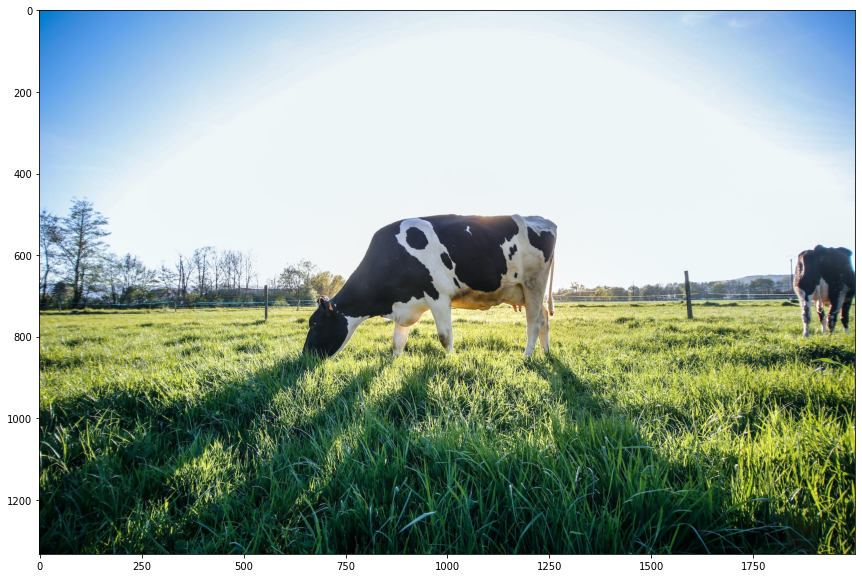

In [77]:
plt.figure(figsize=(15, 10))# size of the image 15, 10
plt.imshow(image)
print("The image dimension (h, w, c) =", image.shape)

### **Image (matrix) manipulation**
Now, it's time to apply `NumPy` functions we just learned to this image.

#### Crop an image

The image dimension (h, w, c) = (450, 400, 3)


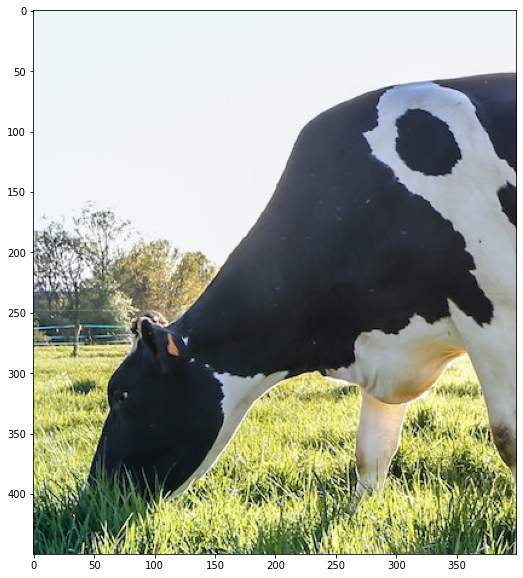

In [80]:
# matrix slicing
image_crop = image[450:900, 600:1000]
plt.figure(figsize=(15, 10))
plt.imshow(image_crop)
print("The image dimension (h, w, c) =", image_crop.shape)

#### Flip an image (image augmentation)

<center><img src="https://github.com/vt-ads/intro_to_phenomics/blob/main/res/l01/augmentation.png?raw=1" width="800"/></center>

By doing this, we can increase the size of the training images by multiple times when we train a classifier .

The image dimension (h, w, c) = (450, 400, 3)


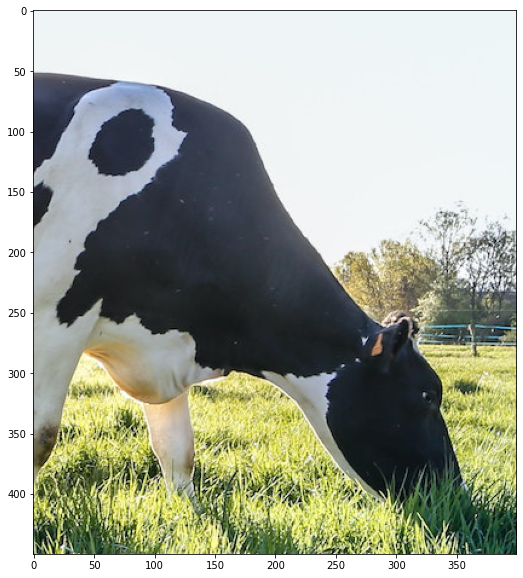

In [81]:
# reversed index
image_flip = image_crop[:, ::-1, :] #<<so flip along column axis, i.e. count backward on second axis
#put  ::-1 on axis to flip it
plt.figure(figsize=(15, 10))
plt.imshow(image_flip)
print("The image dimension (h, w, c) =", image_flip.shape)

#### Down-sample an image
This technique is essential to work with a pre-trained model.

The image dimension (h, w, c) = (67, 100, 3)


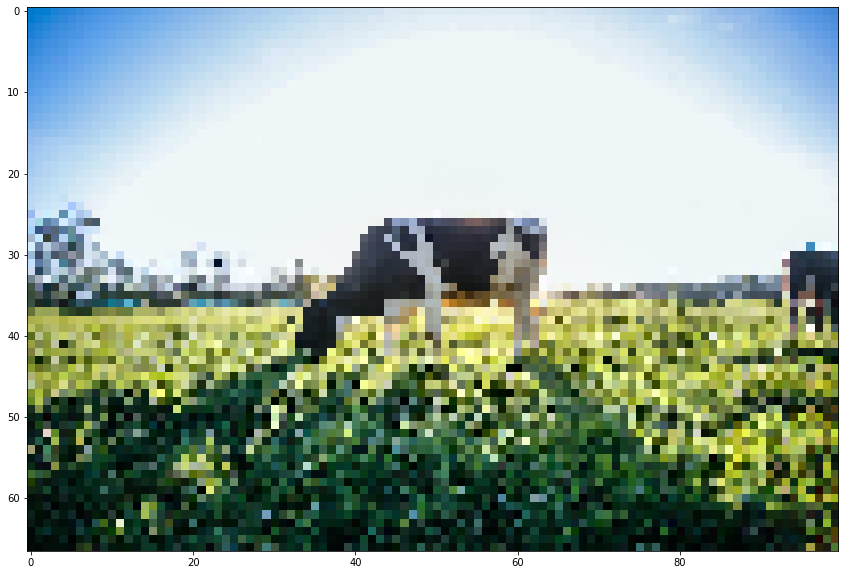

In [ ]:
image_down = image[::20, ::20]
plt.figure(figsize=(15, 10))
plt.imshow(image_down)
print("The image dimension (h, w, c) =", image_down.shape)

#### Display a specific channel

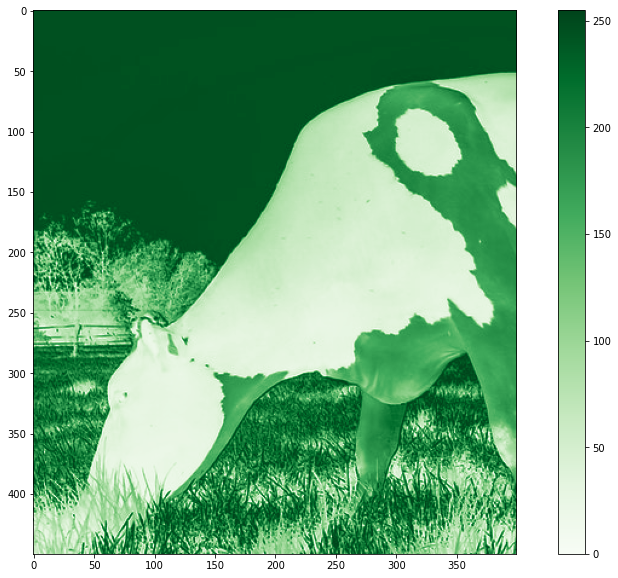

In [83]:
# The lighter the higher of greeness
# the 2nd channel is a green chanel, display as grayscale
plt.figure(figsize=(15, 10))
plt.imshow(image_crop[:, :, 1], cmap="Greens")
plt.colorbar()

#### Summarize pixel information
The colors black and white have least variation between channels. Can we visualize this theory?

Text(0.5, 1.0, 'Standard deviation of each pixel')

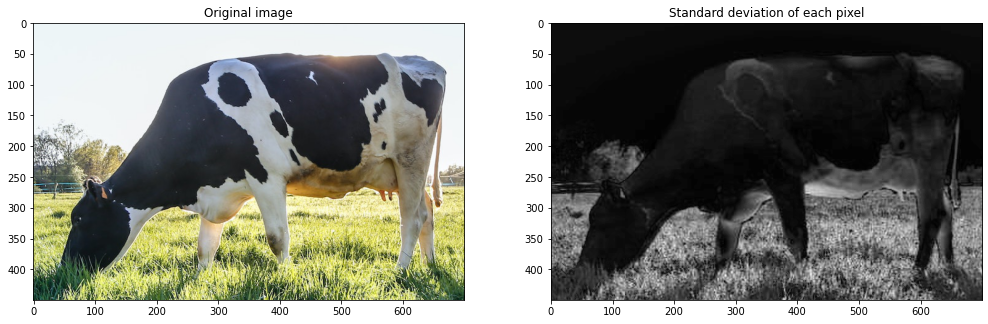

In [ ]:
# display the source image
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 10))
axes[0].imshow(image_crop)
axes[0].set_title("Original image")
# std image (the brighter the higher)
axes[1].imshow(image_crop.std(axis=2), cmap="gray")
axes[1].set_title("Standard deviation of each pixel")
#grey = not much variation, grass is white b/c green channel is much different from other 2 to high stdev

#### Image histogram

<center><img src="https://github.com/vt-ads/intro_to_phenomics/blob/main/res/l01/histogram.png?raw=1" width="800"/></center>

Image histogram is a plot to visualize the distribution of pixel values in each channel. This plot allows us to visually inspect if the image is correctly exposured, or, for example, if any channel has significant higher signals than other channels.

<center><img src="https://github.com/vt-ads/intro_to_phenomics/blob/main/res/l01/hist_trans.png?raw=1" width="800"/></center>

We can change the image dimension and make it easier to access to each channel.

In [ ]:
# use "-1" to let Python figure out the remaining dimension
print("original dimension ", image_crop.shape)

# (pixels, channels)
channels = image_crop.reshape((-1, 3))
print("flattened dimension", channels.shape)

# (channels, pixels): let the channel axis become the first axis
channels = channels.transpose()
print("final dimension    ", channels.shape)

original dimension  (450, 700, 3)
flattened dimension (315000, 3)
final dimension     (3, 315000)


In [ ]:
# since (r, g, b) are now on the first axis.
red, green, blue = channels
print("red:   ", red.shape)
print("green: ", green.shape)
print("blue:  ", blue.shape)

red:    (315000,)
green:  (315000,)
blue:   (315000,)


In [ ]:
# One-liners (use . to chain the result)
red, green, blue = image_crop.reshape((-1, 3)).transpose()
print("red:   ", red.shape)
print("green: ", green.shape)
print("blue:  ", blue.shape)

red:    (315000,)
green:  (315000,)
blue:   (315000,)


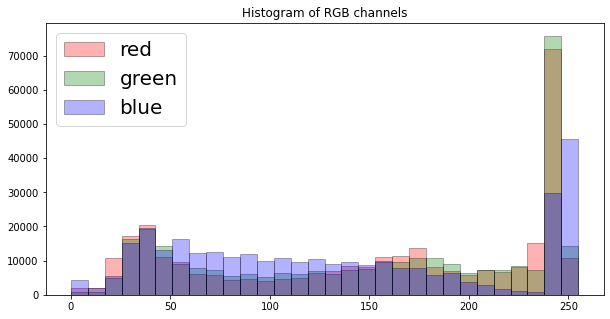

In [ ]:
# define parameters
params = dict(bins=30, alpha=.3, edgecolor="black")
colors = ["red", "green", "blue"]
# plotting
plt.figure(figsize=(10, 5))
plt.title("Histogram of RGB channels")
for i, bar in enumerate([red, green, blue]):
    # i is the iteration number starting from 0 (and 1, 2,...)
    plt.hist(bar, color=colors[i], label=colors[i], **params)
plt.legend(fontsize=20)